# EDA - Predicting Students' Final Grade

Ces données portent sur les résultats des élèves de deux écoles portugaises dans l'enseignement secondaire. Les attributs des données comprennent les notes des élèves, les caractéristiques démographiques, sociales et scolaires)et elles ont été recueillies à l'aide de rapports scolaires et de questionnaires. Deux ensembles de données sont fournis concernant la performance dans deux sujets distincts : Mathématiques (mat) et portugais (por).

In [390]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [391]:
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [392]:
%matplotlib inline
sns.set(rc={'figure.figsize':(16,8)})

## 1- Découverte des données

In [393]:
df = pd.read_csv('students.csv', index_col=0)

In [394]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2.0,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1.0,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,NaN,other,mother,1.0,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1.0,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1.0,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 33 columns):
school        391 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          343 non-null object
Fjob          345 non-null object
reason        395 non-null object
guardian      381 non-null object
traveltime    337 non-null float64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 

In [396]:
print(f'Le dataset comporte {df.shape[0]} samples et {df.shape[1]} variables')

Le dataset comporte 395 samples et 33 variables


In [397]:
df_col = df.columns.tolist()
print('Les 33 variables sont les suivantes :')
df_col

Les 33 variables sont les suivantes :


['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [398]:
num_var = ['age', 'absences', 'G1', 'G2', 'G3']
cat_var = ['school', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
print(f'Les variables de type numérique sont les suivantes :\n\n{num_var}\n\n')
print(f'Les variables de type objet/catégorie sont les suivantes:\n\n{cat_var}')

Les variables de type numérique sont les suivantes :

['age', 'absences', 'G1', 'G2', 'G3']


Les variables de type objet/catégorie sont les suivantes:

['school', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [399]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,337.0,1.445104,0.709700,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


# 2 - Données manquantes et/ou dupliquées

In [400]:
duplicated_values = df.duplicated().sum()
print(f'Le dataset comporte {duplicated_values} valeurs dupliquées.')

Le dataset comporte 0 valeurs dupliquées.


les features ont des données manquantes ['traveltime', 'Mjob', 'Fjob', 'guardian', 'school']


Text(0.5,1,'ratio of missing data')

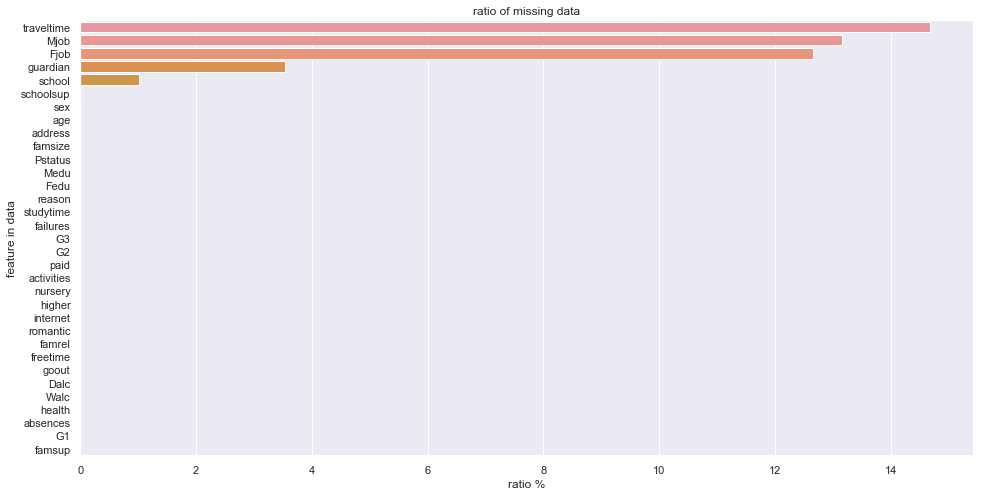

In [401]:
null_c = df.isnull().sum(axis=0).sort_values(ascending=False)*100/df.shape[0]
print("les features ont des données manquantes {}".format(list(null_c[null_c !=0].index)))
a = null_c.values
b = null_c.index
sns.barplot(x=a, y=b  )
plt.xlabel("ratio %")
plt.ylabel("feature in data")
plt.title("ratio of missing data")

In [402]:
col_nan = df.columns[df.isnull().any()]
X_text = {'school', 'Mjob', 'Fjob', 'guardian'}
print(f'Les variables contenant des données manquantes sont les suivantes :\n\n{X_text}')

Les variables contenant des données manquantes sont les suivantes :

{'Fjob', 'guardian', 'school', 'Mjob'}


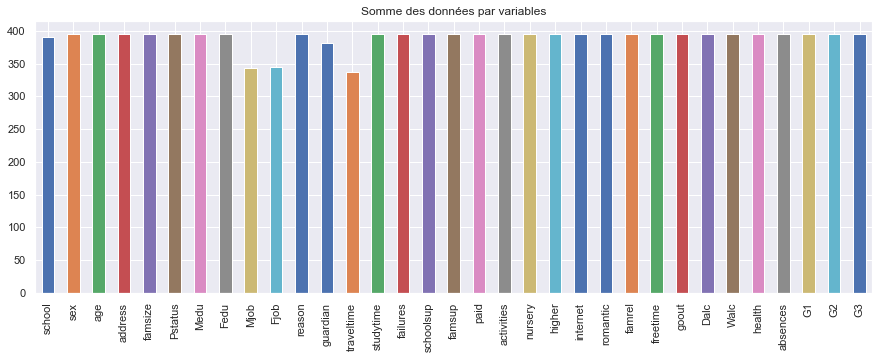

In [403]:
df.count().plot.bar(title='Somme des données par variables', figsize=(15, 5))

#### Toutefois, lorsque l'on compare ces données manquantes à l'ensemble du dataset, on se rend compte que la différence d'échantillons n'est pas suffisante pour justifier une exclusion de ces variables. Nous avons donc décidé de gérer les données manquantes de la manière suivante : 
- traveltime => mode
- school => mode
- guardian => other
- Mjob => add other feature => other
- Fjob => add other feature => other

In [404]:
df.loc[df['traveltime'].isnull(),'traveltime'] = df['traveltime'].mode().ravel()[0]
df.loc[df['school'].isnull(),'school'] = df['school'].mode().ravel()[0]
df.loc[df['guardian'].isnull(),'guardian'] = 'other'
df.loc[df['Mjob'].isnull(),'Mjob'] = 'other'
df.loc[df['Fjob'].isnull(),'Fjob'] = 'other'

# 3 - Outliers

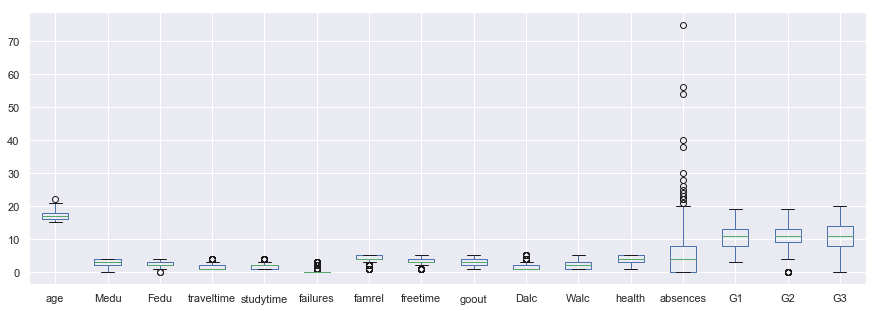

In [405]:
df.boxplot(figsize=(15,5))

# 4 - Analyse uni-variée

Regardons la variable que nous devons prédire : 

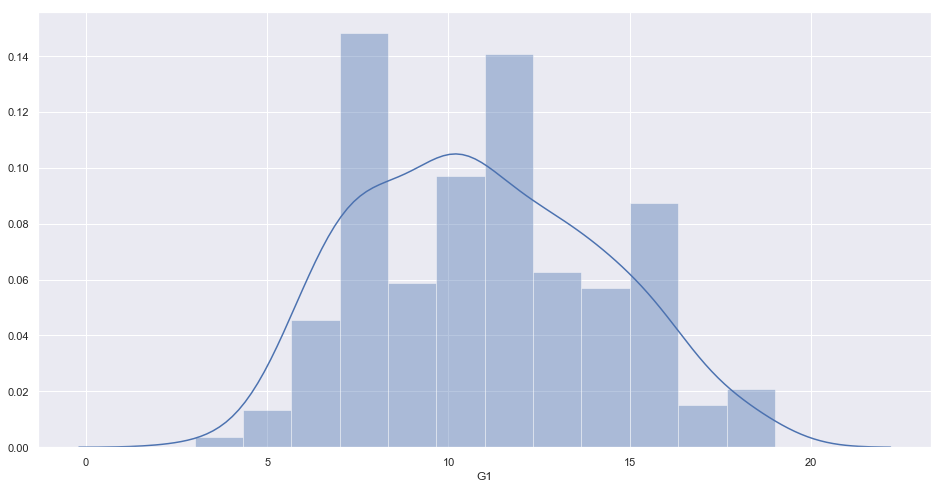

In [406]:
sns.distplot(df['G1'])

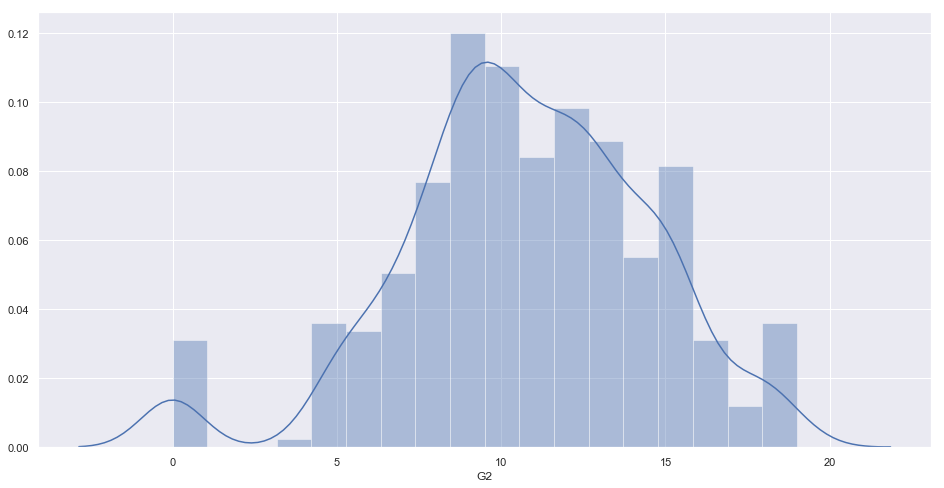

In [407]:
sns.distplot(df['G2'])

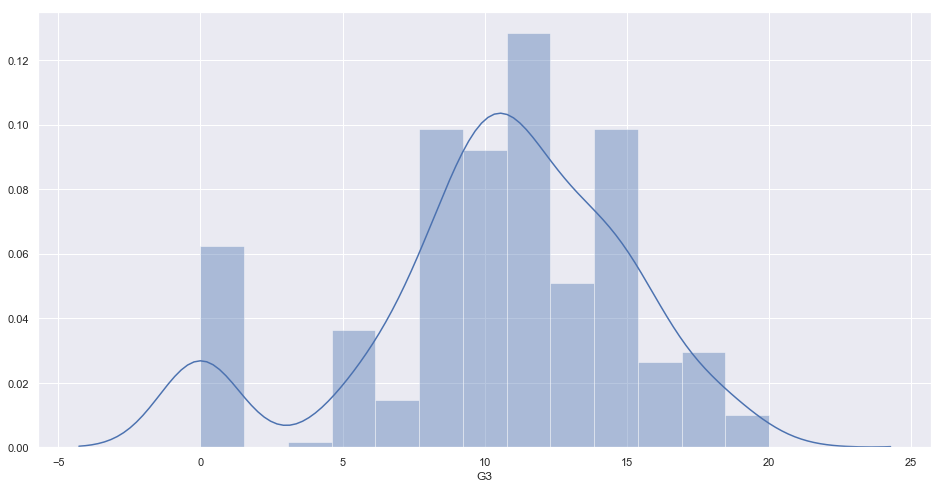

In [408]:
sns.distplot(df['G3'])

#### On remarque un nombre anormalement élevé d'élèves ayant obtenu la note de zéro au G3, qui fausse la distribution normale. Il faudra se demander pourquoi lors de l'analyse multi-variée.

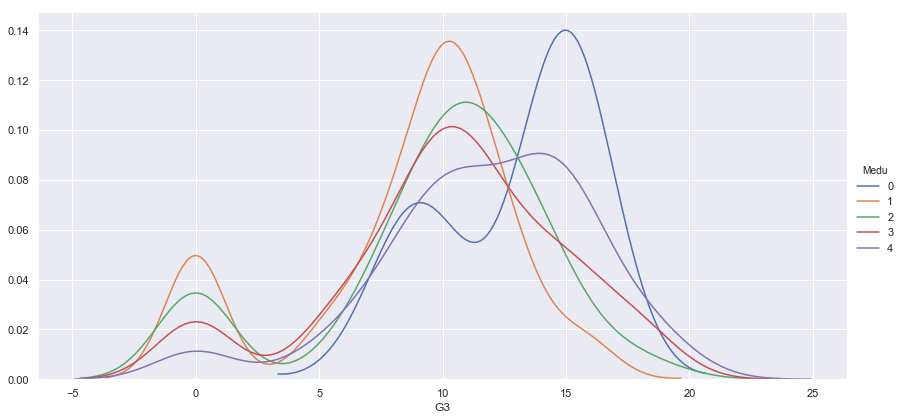

In [409]:
g = sns.FacetGrid(df, hue='Medu', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

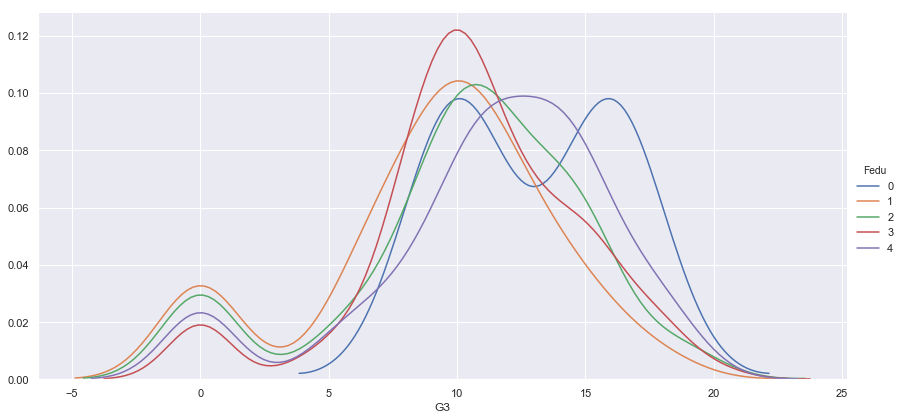

In [410]:
g = sns.FacetGrid(df, hue='Fedu', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

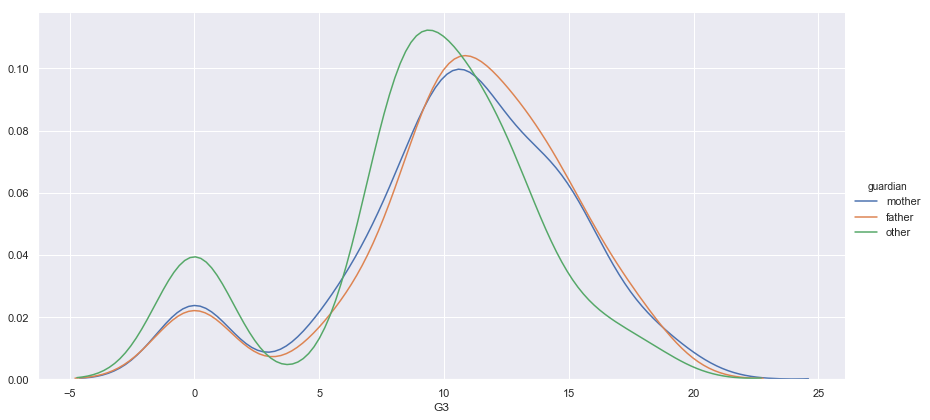

In [411]:
g = sns.FacetGrid(df, hue='guardian', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

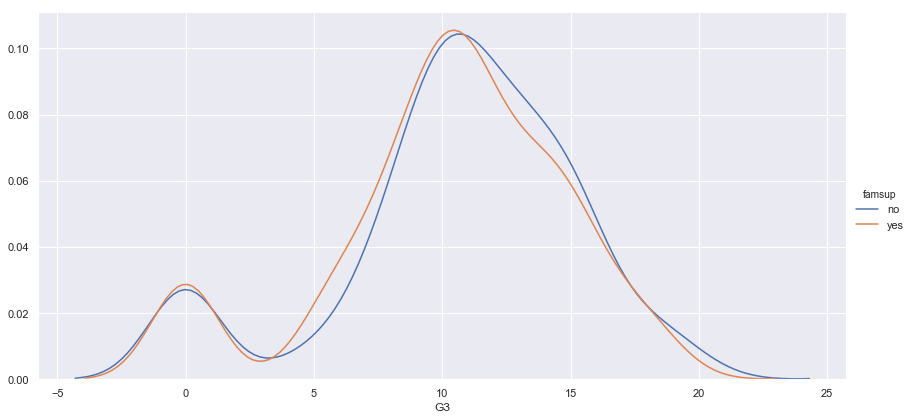

In [412]:
g = sns.FacetGrid(df, hue='famsup', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

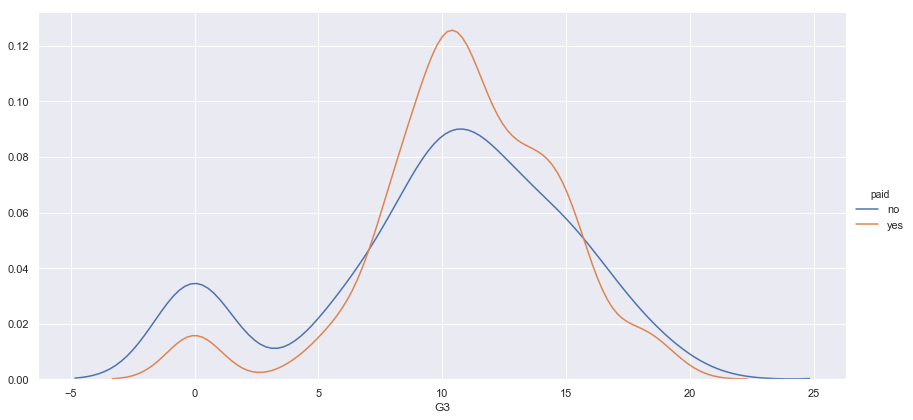

In [413]:
g = sns.FacetGrid(df, hue='paid', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

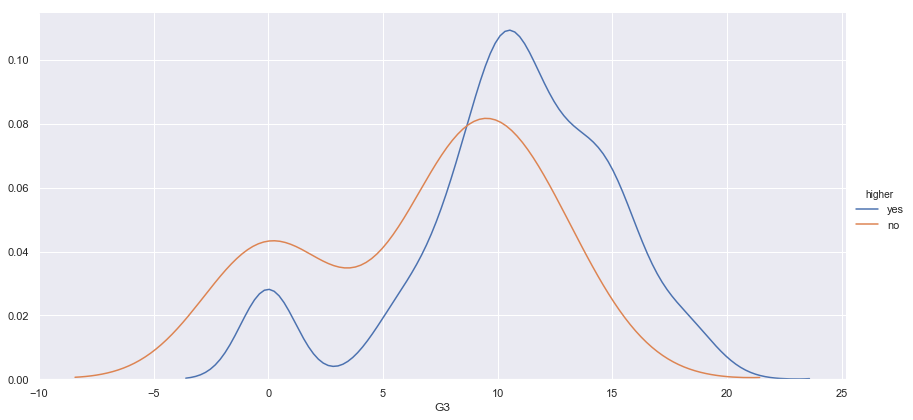

In [414]:
g = sns.FacetGrid(df, hue='higher', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

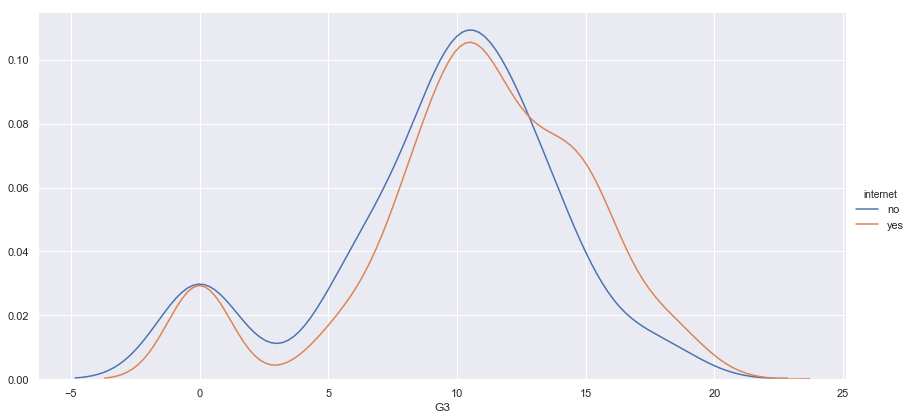

In [415]:
g = sns.FacetGrid(df, hue='internet', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

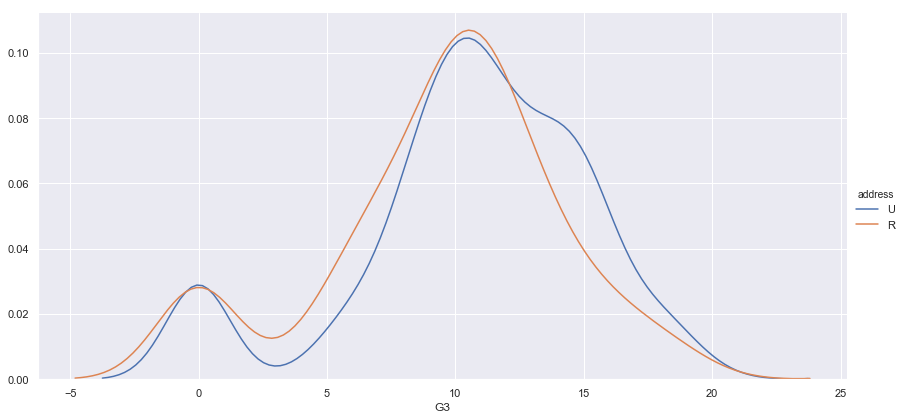

In [416]:
g = sns.FacetGrid(df, hue='address', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

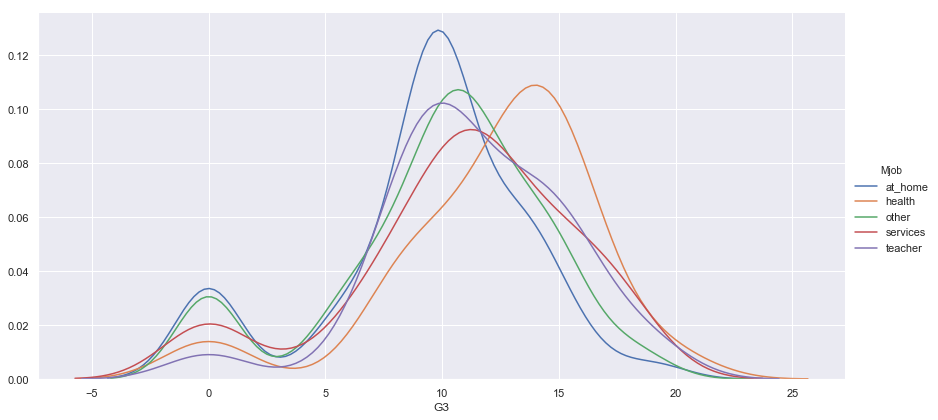

In [417]:
g = sns.FacetGrid(df, hue='Mjob', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

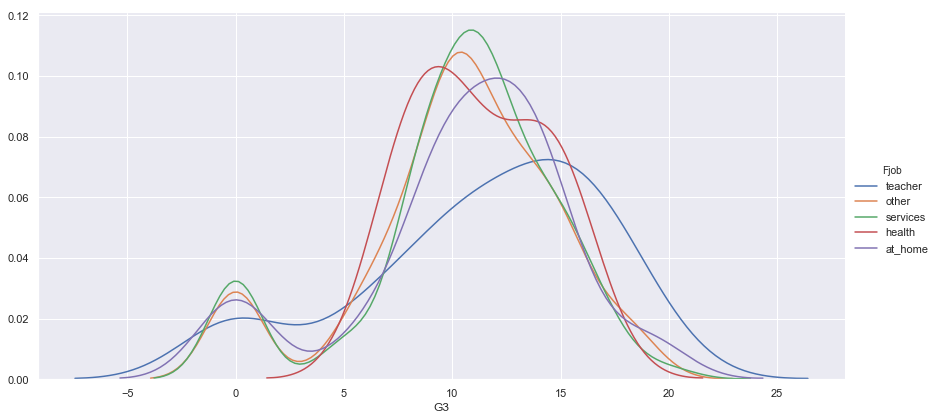

In [418]:
g = sns.FacetGrid(df, hue='Fjob', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

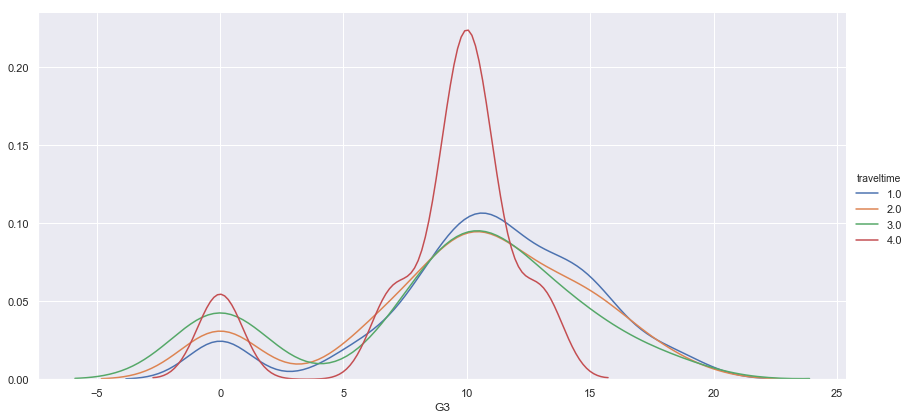

In [419]:
g = sns.FacetGrid(df, hue='traveltime', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

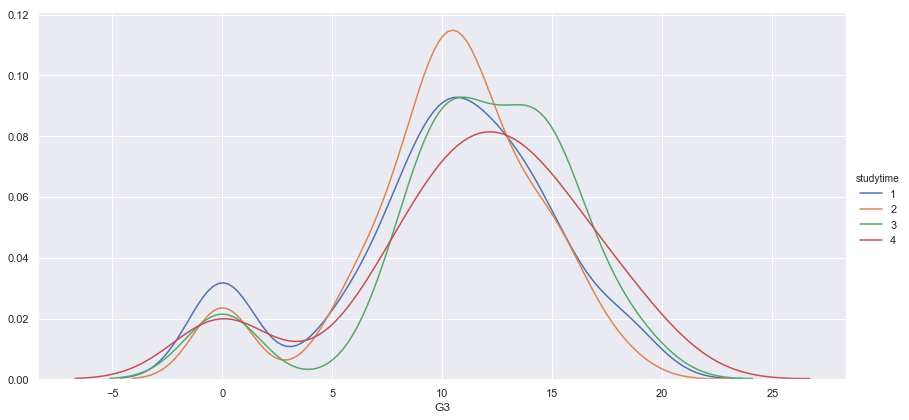

In [420]:
g = sns.FacetGrid(df, hue='studytime', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

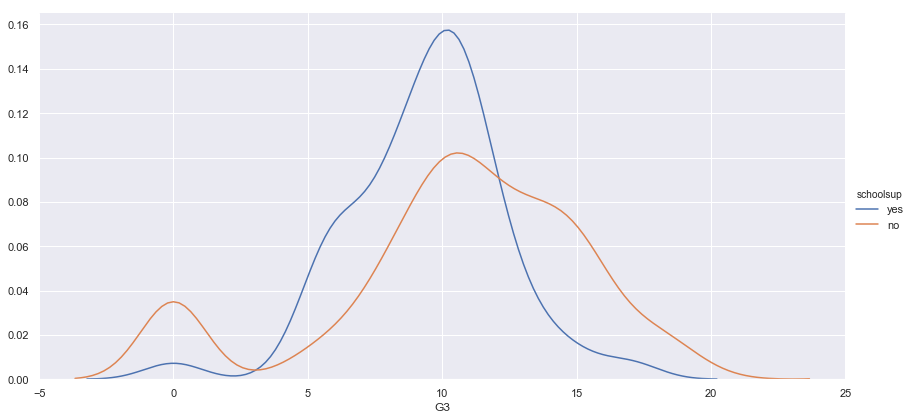

In [421]:
g = sns.FacetGrid(df, hue='schoolsup', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

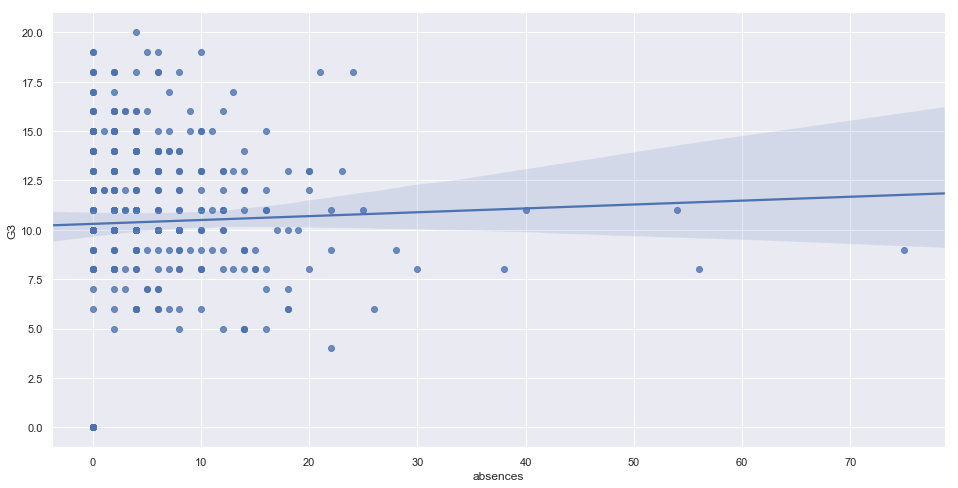

In [422]:

sns.regplot('absences', 'G3', data=df)

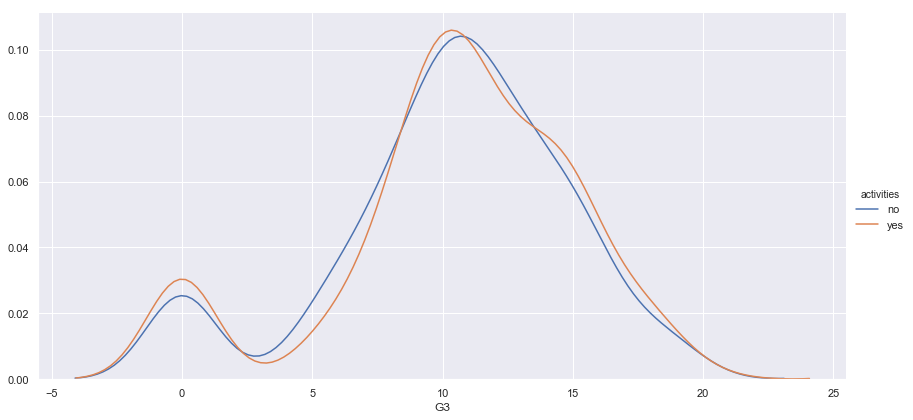

In [423]:
g = sns.FacetGrid(df, hue='activities', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

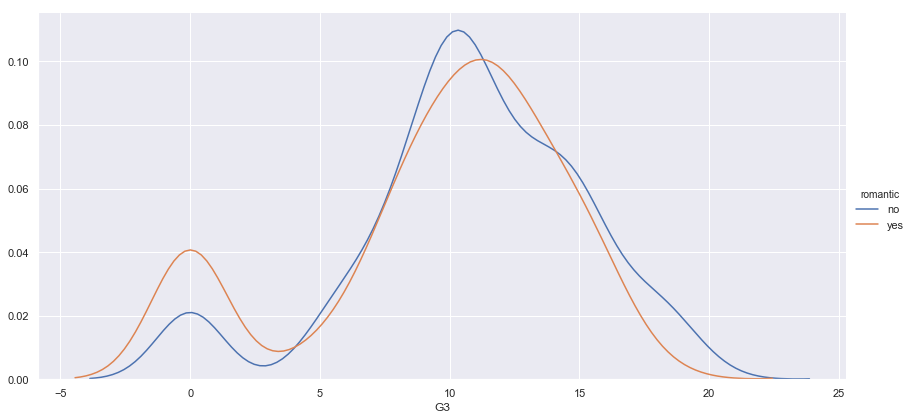

In [424]:
g = sns.FacetGrid(df, hue='romantic', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

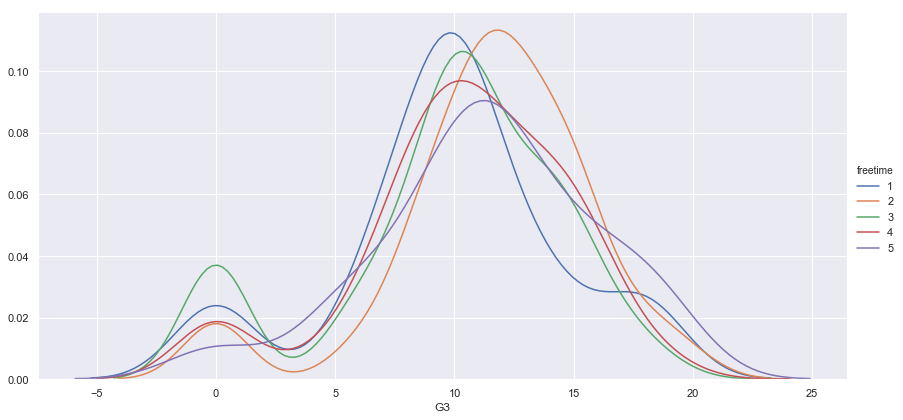

In [425]:
g = sns.FacetGrid(df, hue='freetime', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

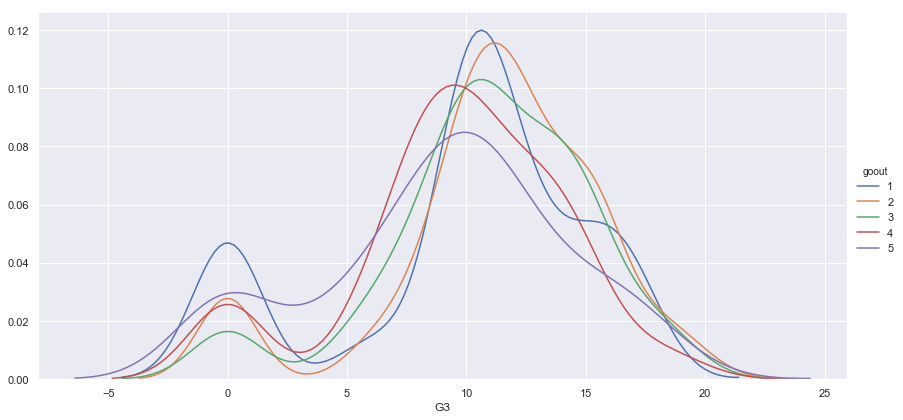

In [426]:
g = sns.FacetGrid(df, hue='goout', height=6, aspect=2)
g.map(sns.kdeplot,'G3')
g.add_legend()

In [427]:
col_num = ['age', 'absences', 'G1', 'G2', 'G3']
col_cat = list(set(df.columns).difference(set(col_num)))
print(col_num)
print()
print(col_cat)

['age', 'absences', 'G1', 'G2', 'G3']

['traveltime', 'Fjob', 'Medu', 'school', 'nursery', 'guardian', 'schoolsup', 'romantic', 'failures', 'famsize', 'paid', 'Pstatus', 'freetime', 'reason', 'famsup', 'goout', 'Walc', 'health', 'Mjob', 'internet', 'studytime', 'famrel', 'higher', 'activities', 'Dalc', 'Fedu', 'address', 'sex']


# 5 - Analyse multi-variée 

Hypothèse 1 : si l'élève a obtenu zéro à l'examen précédent, il obtiendra zéro au G3.

In [428]:
df[df['G2']==0.][['G2','G3']]

,G2,G3
130,0,0
131,0,0
134,0,0
135,0,0
136,0,0
137,0,0
144,0,0
153,0,0
162,0,0
242,0,0


#### HYPOTHÈSE VÉRIFIÉE : 100% des élèves ayant obtenu un zéro au G2 ont également obtenu un zéro au G3. Cela nous amène à penser que l'obtention d'un zéro à ce type d'examen est éliminatoire et confère un zéro automatique pour l'examen suivant.

Hypothèse 2 : les ambitions académiques de l'élève influent fortement sur son succès à l'examen.

In [429]:
df[(df['higher']=='no') & (df['G3'] >= 10.)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
78,GP,M,17,U,GT3,T,2,1,other,other,home,mother,2.0,1,3,yes,yes,no,yes,yes,no,yes,no,4,5,1,1,1,3,2,8,8,10
163,GP,M,17,U,GT3,T,1,3,at_home,services,course,father,1.0,1,0,no,no,no,no,yes,no,yes,no,5,3,3,1,4,2,2,10,10,10
165,GP,M,16,U,GT3,T,3,2,services,services,course,mother,2.0,1,1,no,yes,no,yes,no,no,no,no,4,5,2,1,1,2,16,12,11,12
166,GP,M,16,U,GT3,T,2,2,other,other,course,father,1.0,2,0,no,no,no,no,yes,no,yes,no,4,3,5,2,4,4,4,10,10,10
311,GP,F,19,U,GT3,T,2,1,at_home,other,other,other,3.0,2,0,no,yes,no,no,yes,no,yes,yes,3,4,1,1,1,2,20,14,12,13
361,MS,M,18,R,LE3,T,1,1,at_home,other,other,mother,2.0,2,1,no,no,no,yes,no,no,no,no,4,4,3,2,3,5,2,13,12,12
371,MS,M,18,R,LE3,T,1,2,other,services,other,father,1.0,1,0,no,yes,yes,yes,yes,no,yes,yes,4,3,3,2,3,3,3,14,12,12


Parmi les étudiants qui n'expriment pas le souhait de poursuivre des études supérieures après le lycée, seuls sept ont obtenu une note supérieure à 10 au G3. Voyons-voir si les étudiants désirant poursuivre des études supérieures ont bien performé au G3. 

In [430]:
df[(df['higher']=='yes') & (df['G3']<10)][['higher','age']]

,higher,age
0,yes,18
1,yes,17
7,yes,17
10,yes,15
18,yes,17
24,yes,15
25,yes,16
35,yes,15
44,yes,16
45,yes,15


#### HYPOTHÈSE NON VÉRIFIÉE : Parmi les étudiants désirant poursuivre des études supérieures, 117 n'ont pas obtenu la moyenne au G3. Ces résultats nous montrent que si l'ambition de poursuivre des études supérieures ne suffit pas à avoir de bonnes notes, le fait au contraire de ne pas en avoir semble se traduire par un échec significatif à l'examen.

Hypothèse 3 : des sorties fréquentes entre amis cumulée à une consommation régulière d'alcool en semaine et pendant le week-end met en péril l'obtention de la moyenne au G3.

In [431]:
df[(df['Dalc']==3) & (df['Walc']==3) & (df['goout']==5) & (df['G3']>=10)][['Dalc', 'Walc', 'goout', 'G3']]

,Dalc,Walc,goout,G3


#### HYPOTHÈSE VÉRIFIÉE : Parmi les étudiants qui ont admis une forte consommation d'alcool en semaine et pendant le weekend, accompagnée de sorties fréquentes entre amis, aucun n'a obtenu la moyenne au G3. 

In [432]:
df[(df['activities']=='yes') & (df['romantic']=='yes') & (df['G3']>=10)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1.0,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,home,mother,1.0,2,0,no,yes,yes,yes,yes,yes,yes,yes,4,4,5,5,5,5,16,10,12,11
32,GP,M,15,R,GT3,T,4,3,teacher,other,course,mother,1.0,2,0,no,yes,no,yes,yes,yes,yes,yes,4,5,2,1,1,5,0,17,16,16
37,GP,M,16,R,GT3,A,4,4,other,teacher,reputation,mother,2.0,3,0,no,yes,no,yes,yes,yes,yes,yes,2,4,3,1,1,5,7,15,16,15
40,GP,F,16,U,LE3,T,2,2,other,other,home,mother,2.0,2,1,no,yes,no,yes,no,yes,yes,yes,3,3,3,1,2,3,25,7,10,11
55,GP,F,16,U,GT3,A,2,1,other,other,other,mother,1.0,2,0,no,no,yes,yes,yes,yes,yes,yes,5,3,4,1,1,2,8,8,9,10
61,GP,F,16,U,GT3,T,1,1,services,services,course,father,4.0,1,0,yes,yes,no,yes,no,yes,yes,yes,5,5,5,5,5,5,6,10,8,11
64,GP,F,15,U,LE3,T,4,3,services,services,reputation,father,1.0,2,0,yes,no,no,yes,yes,yes,yes,yes,4,4,4,2,4,2,0,10,10,10
66,GP,M,15,U,GT3,A,4,4,other,services,reputation,mother,1.0,4,0,no,yes,no,yes,no,yes,yes,yes,1,3,3,5,5,3,4,13,13,12
80,GP,M,15,U,GT3,T,2,3,other,services,course,father,1.0,1,0,yes,yes,yes,yes,no,yes,yes,yes,3,2,2,1,3,3,2,10,12,12


Hypothèse 4 : pour les étudiants vivant en milieu rural, plus le temps de transport pour se rendre à l'école est long, moins ils ont de chance d'obtenir une bonne note à leur examen G3. 

In [433]:
df[(df['address']=='R') & (df['traveltime']>=1) & (df['G3']>=10)][['address', 'traveltime', 'G3']]

,address,traveltime,G3
32,R,1.0,16
37,R,2.0,15
38,R,1.0,11
39,R,1.0,13
60,R,1.0,11
69,R,2.0,16
95,R,1.0,10
96,R,2.0,15
108,R,4.0,13
111,R,1.0,10


In [434]:
df[(df['address']=='R') & (df['traveltime']>=2) & (df['G3']>=10)][['address', 'traveltime', 'G3']]

,address,traveltime,G3
37,R,2.0,15
69,R,2.0,16
96,R,2.0,15
108,R,4.0,13
158,R,3.0,15
197,R,3.0,10
231,R,2.0,11
238,R,3.0,11
265,R,2.0,17
267,R,2.0,11


In [435]:
df[(df['address']=='R') & (df['traveltime']>=3) & (df['G3']>=10)][['address', 'traveltime', 'G3']]

,address,traveltime,G3
108,R,4.0,13
158,R,3.0,15
197,R,3.0,10
238,R,3.0,11
327,R,4.0,10
360,R,3.0,13
369,R,3.0,11
375,R,4.0,10
393,R,3.0,10


#### HYPOTHÈSE VÉRIFIÉE : plus le temps de trajet est long pour les étudiants venant de milieu rural, moins de chance ils ont d'obtenir la moyenne au G3.

#### HYPOTHÈSE 5 : nous nous demandons alors si l'accès à internet à la maison pour les étudiants issus de milieux ruraux joue dans leur note obtenue au G3. 

In [436]:
df[(df['address']=='R') & (df['internet']=='no') & (df['G3']>=10)][['address', 'internet', 'G3']]

,address,internet,G3
39,R,no,13
60,R,no,11
156,R,no,13
157,R,no,10
158,R,no,15
189,R,no,10
214,R,no,10
238,R,no,11
262,R,no,12
273,R,no,14


Hypothèse : les enfants de professeurs ont de meilleures chances de réussir à l'examen G3

In [437]:
df[(df['Mjob']=='teacher') & (df['Fjob']=='teacher') & (df['G3']>=10)][['Mjob', 'Fjob', 'G3']]

,Mjob,Fjob,G3
29,teacher,teacher,11
110,teacher,teacher,19
139,teacher,teacher,15
199,teacher,teacher,10
289,teacher,teacher,15
329,teacher,teacher,14
380,teacher,teacher,14


#### "One Hot Encoding" :

In [438]:
from sklearn.preprocessing  import LabelEncoder

In [439]:
for i in col_cat:
    if df[i].dtypes == 'object':
        le = LabelEncoder()
        le.fit(df[i])
        df[i] = le.transform(df[i])
df[col_cat].head()

,traveltime,Fjob,Medu,school,nursery,guardian,schoolsup,romantic,failures,famsize,paid,Pstatus,freetime,reason,famsup,goout,Walc,health,Mjob,internet,studytime,famrel,higher,activities,Dalc,Fedu,address,sex
0,2.0,4,4,0,1,1,1,0,0,0,0,0,3,0,0,4,1,3,0,0,2,4,1,0,1,4,1,0
1,1.0,2,1,0,0,0,0,0,0,0,0,1,3,0,1,3,1,3,0,1,2,5,1,0,1,1,1,0
2,1.0,2,1,0,1,1,1,0,3,1,1,1,3,2,0,2,3,3,0,1,2,4,1,0,2,1,1,0
3,1.0,3,4,0,1,1,0,1,0,0,1,1,2,1,1,2,1,5,1,1,3,3,1,1,1,2,1,0
4,1.0,2,3,0,1,0,0,0,0,0,1,1,3,1,1,2,2,5,2,0,2,4,1,0,1,3,1,0


In [440]:
trace = go.Heatmap(z=df.corr().values, x=list(df.corr().index), y=list(df.corr().index), zmin=-1, zmax=1)
data=[trace]
iplot(data, filename='heatmap-corr')

In [ ]:
sns.heatmap(df.corr(),annot=True, linewidth=.5, fmt=".1f", square=True)

In [441]:
df.corr()[abs(df.corr()['G3'])>0.2]['G3']

Medu        0.217147
failures   -0.360415
G1          0.801468
G2          0.904868
G3          1.000000
Name: G3, dtype: float64

In [442]:
trace = go.Heatmap(z=df.corr().values, x=list(df.corr().index), y=list(df.corr().index), zmin=0.5,zmax=1)
data=[trace]
iplot(data, filename='heatmap-corr')

In [443]:
trace = go.Heatmap(z=df.corr().values, x=list(df.corr().index), y=list(df.corr().index), zmin=-1,zmax=-0.5)
data=[trace]
iplot(data, filename='heatmap-corr')

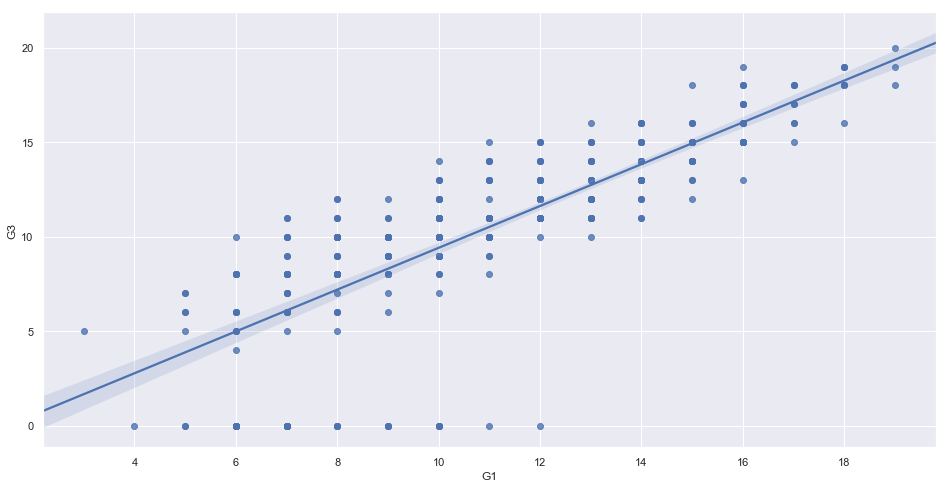

In [444]:
sns.regplot('G1', 'G3', data=df)

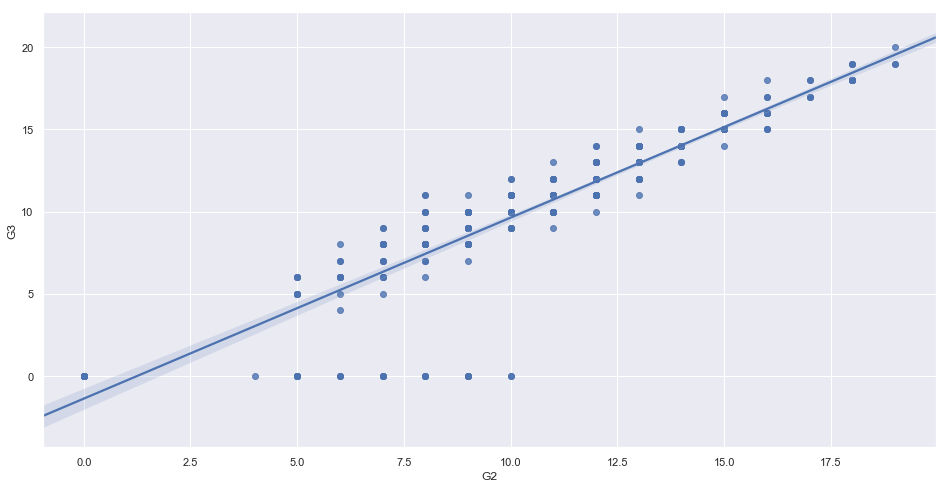

In [445]:
sns.regplot('G2', 'G3', data=df)

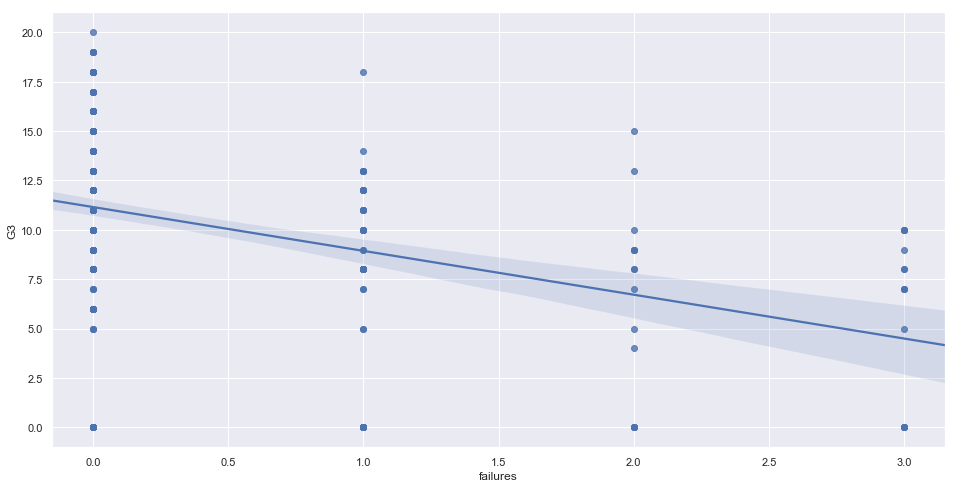

In [446]:
sns.regplot('failures', 'G3', data=df)

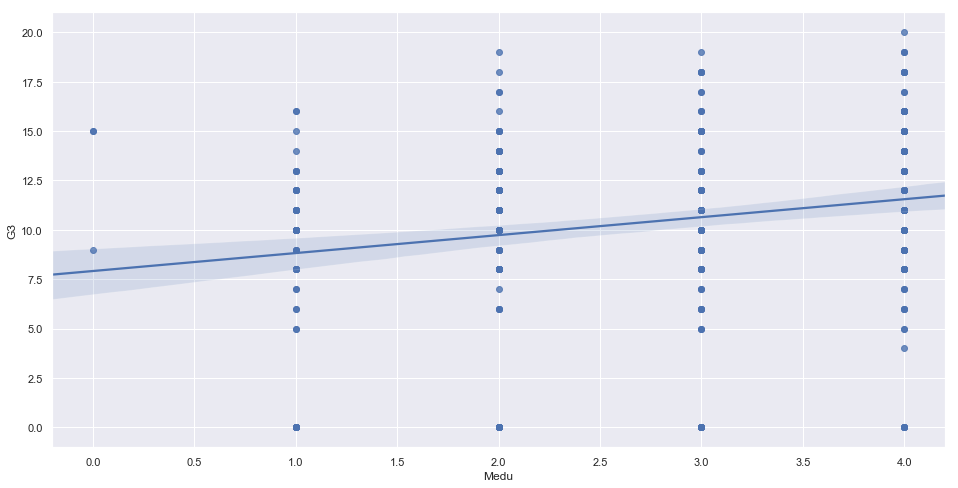

In [447]:
sns.regplot('Medu', 'G3', data=df)

# CONCLUSION

#### 1°/Prédiction fiable à 100% : si l'étudiant a obtenu un zéro au cours de son examen G2, il aura nécessairement zéro au G3. Supposition : le zéro est une note éliminatoire.
#### 2°/Tendance observable : pour les étudiants habitant la campagne, les notes baissent à mesure que le trajet scolaire augmente.
### 3°/

In [448]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score

In [449]:
dt = df.copy()
y = [1 if i >= 10 else 0 for i in dt.loc[:,'G3'].values]
x = dt.drop('G3',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=42)
clf = LogisticRegression()
clf.fit(x_train.values, y_train)
y_pred = clf.predict(x_test)
print(f"{accuracy_score(y_test,y_pred):.2f}")

0.93


In [450]:
def clf_log(a):
    dt = df.copy()
    y = [1 if i >= 10 else 0 for i in dt.loc[:,'G3'].values]
    dt.drop('G3', axis=1, inplace=True)
    if a == 'all':
        a = list(dt.columns)
    x = dt[a]
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=42)
    clf = LogisticRegression()
    clf.fit(x_train.values, y_train)
    y_pred = clf.predict(x_test)
    print(f"{accuracy_score(y_test,y_pred):.2f}")

In [451]:
clf_log('all')
clf_log(['G1'])
clf_log(['G2'])
clf_log(['G1','G2'])
clf_log(['G2','failures'])
clf_log(['G2','failures','Medu'])

0.93
0.80
0.82
0.82
0.90
0.95
